In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import xarray as xr
import pandas as pd

In [2]:
## data and ref imports
ds = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_Fraser_all_20170101_20200101.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1- mesh.tmask[0]

In [3]:
## global definitions
rho = 1026
rho_inv = 1/rho

# set up the volume with the tmask
volume = (1-tmask) * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]

# need a fudge factor to use log scales
fudge = 0.0001

In [4]:
def dye_to_volume(jdepth, volume, rho_inv, data):
    data_np = data[0:jdepth].values
    river_arr = rho_inv * np.multiply(volume[0:jdepth], data_np)
    return river_arr

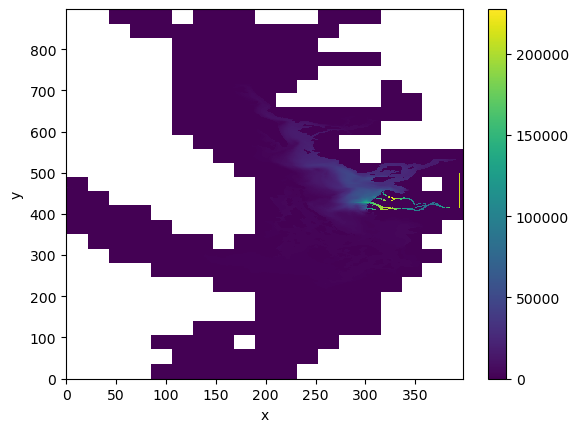

In [43]:
dye_to_volume(40, volume, rho_inv, ds.fraser_river[64])[0].plot()

In [31]:
time_idx = 64
depth = 0

volume_conv = dye_to_volume(40, volume, rho_inv, ds.fraser_river[time_idx])[depth]
# volume_conv[300:500, 1:30] = np.nanmean(volume_conv[300:500, 30:59])
# volume_conv.where()

Text(0.5, 1.0, 'Fraser River 2017-03-06 \n depth = 0.5 m')

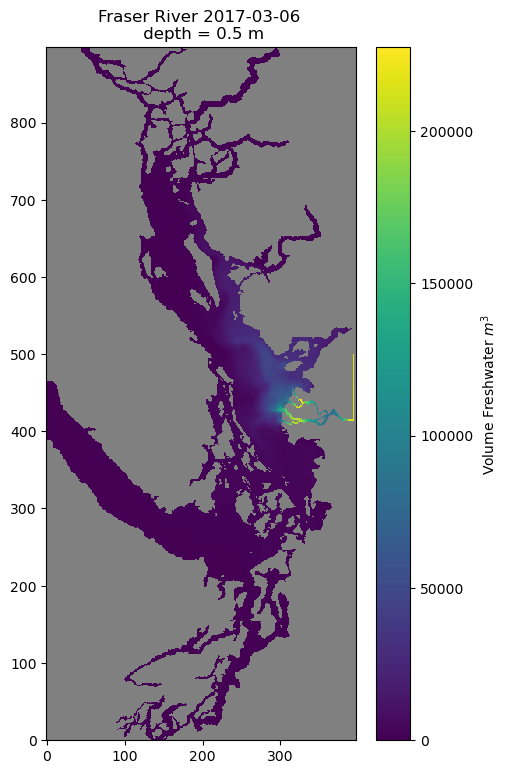

In [32]:
# time_idx = 1000
# depth = 0 
# cmap = mpl.colormaps['Reds']
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 9))

# freshwater = np.ma.masked_array(ds.fraser_river[time_idx, depth], mask=tmask[depth])
freshwater = np.ma.masked_array(volume_conv, mask=tmask[depth])
Z = freshwater + fudge
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, vmin=0, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('Fraser River {} \n depth = {} m'.format(str(dtime.date()), round(float(ds['depth'][depth].values), 2)))

(0.0, 30.0)

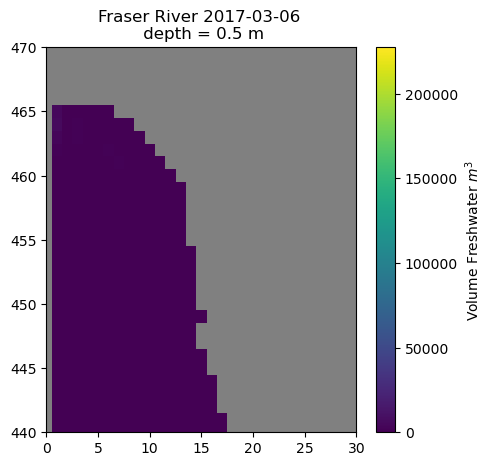

In [33]:
# time_idx = 500
# depth = 0 
# cmap = mpl.colormaps['Reds']
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 5))

freshwater = np.ma.masked_array(ds.fraser_river[time_idx, depth], mask=tmask[depth])
freshwater = np.ma.masked_array(volume_conv, mask=tmask[depth])
Z = freshwater + fudge
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, vmin=0, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('Fraser River {} \n depth = {} m'.format(str(dtime.date()), round(float(ds['depth'][depth].values), 2)))

ax.set_ylim([440, 470])
ax.set_xlim([0, 30])

In [34]:
np.nansum(dye_to_volume(40, volume, rho_inv, ds.fraser_river[time_idx]), axis=0).shape

(898, 398)

Text(0.5, 1.0, 'Fraser River 2017-03-06 \n depth = 0.5 m')

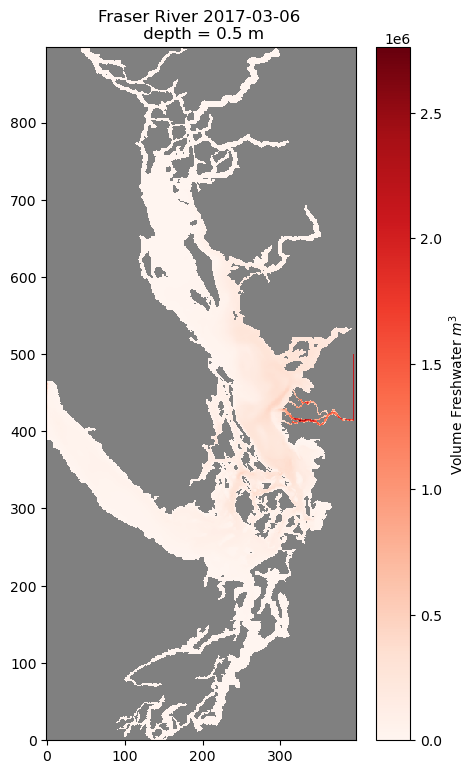

In [35]:
# time_idx = 10
# depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 9))

# freshwater = np.ma.masked_array(ds.fraser_river[time_idx, depth], mask=tmask[depth])
freshwater = np.ma.masked_array(np.nansum(dye_to_volume(40, volume, rho_inv, ds.fraser_river[time_idx]), axis=0), mask=tmask[depth])
Z = freshwater + fudge
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, vmin=0, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('Fraser River {} \n depth = {} m'.format(str(dtime.date()), round(float(ds['depth'][depth].values), 2)))

## Do the test from day 70 to day 90 in the run to test. Susan also said 200

In [36]:
ds2 = xr.open_dataset('/ocean/cdonaldson/research_runs/dye_reflect_test/06mar17/SalishSea_1d_20170306_20170306_rivr_T.nc')

In [37]:
ds2['fraser_river']

<xarray.DataArray 'fraser_river' (time_counter: 1, deptht: 40, y: 898, x: 398)>
[14296160 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
  * deptht         (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5 441.5
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2017-03-06T12:00:00
Dimensions without coordinates: y, x
Attributes:
    long_name:           Fraser River
    units:               1
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area

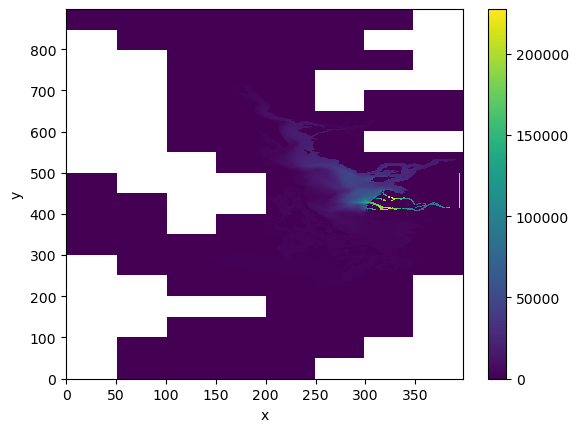

In [38]:
dye_to_volume(40, volume, rho_inv, ds2['fraser_river'][0])[0].plot()

In [40]:
volume_conv2 = dye_to_volume(40, volume, rho_inv, ds2['fraser_river'][0])[depth]

Text(0.5, 1.0, 'Fraser River 2017-03-06 \n depth = 0.5 m')

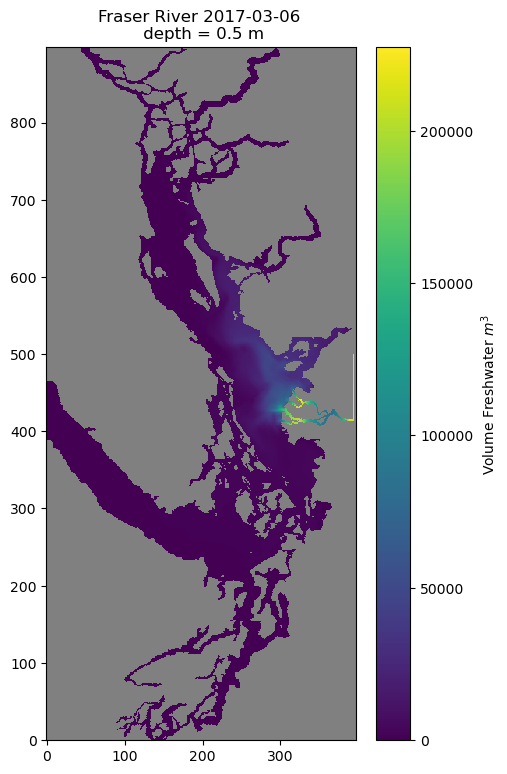

In [41]:
# cmap = mpl.colormaps['Reds']
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 9))

# freshwater = np.ma.masked_array(ds.fraser_river[time_idx, depth], mask=tmask[depth])
freshwater = np.ma.masked_array(volume_conv2, mask=tmask[depth])
Z = freshwater + fudge
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, vmin=0, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('Fraser River {} \n depth = {} m'.format(str(dtime.date()), round(float(ds['depth'][depth].values), 2)))

(0.0, 30.0)

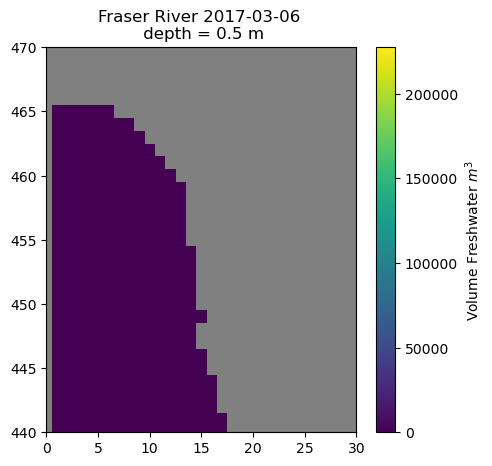

In [44]:
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 5))

# freshwater = np.ma.masked_array(ds.fraser_river[time_idx, depth], mask=tmask[depth])
freshwater = np.ma.masked_array(volume_conv2, mask=tmask[depth])
Z = freshwater + fudge
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, vmin=0, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('Fraser River {} \n depth = {} m'.format(str(dtime.date()), round(float(ds['depth'][depth].values), 2)))

ax.set_ylim([440, 470])
ax.set_xlim([0, 30])

Text(0.5, 1.0, 'Fraser River 2017-03-06 \n depth = 0.5 m')

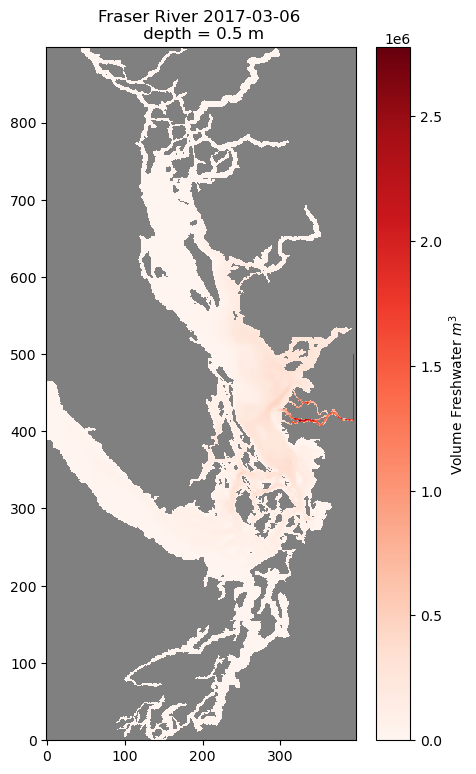

In [46]:
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 9))

# freshwater = np.ma.masked_array(ds.fraser_river[time_idx, depth], mask=tmask[depth])
freshwater = np.ma.masked_array(np.nansum(dye_to_volume(40, volume, rho_inv, ds2['fraser_river'][0]), axis=0), mask=tmask[depth])
Z = freshwater + fudge
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, vmin=0, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('Fraser River {} \n depth = {} m'.format(str(dtime.date()), round(float(ds['depth'][depth].values), 2)))

## show the difference

Text(0.5, 1.0, 'ver_frs - ver_none \n Fraser River 2017-03-06 \n depth = 0.5 m')

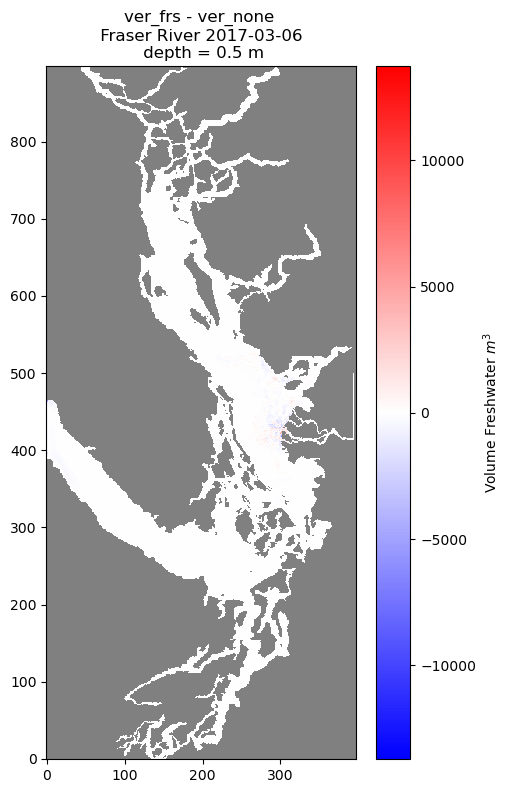

In [86]:
cmap = mpl.colormaps['bwr']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 9))

# freshwater = np.ma.masked_array(ds.fraser_river[time_idx, depth], mask=tmask[depth])
freshwater = np.ma.masked_array(volume_conv2 - volume_conv, mask=tmask[depth])
Z = freshwater + fudge
max_value = np.abs(volume_conv2 - volume_conv).max()
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, vmin=-max_value, vmax=max_value, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('ver_frs - ver_none \n Fraser River {} \n depth = {} m'.format(str(dtime.date()), round(float(ds['depth'][depth].values), 2)))

(0.0, 30.0)

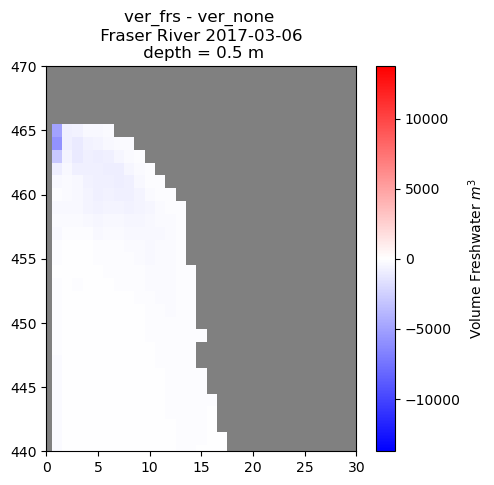

In [87]:
cmap = mpl.colormaps['bwr']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 5))

# freshwater = np.ma.masked_array(ds.fraser_river[time_idx, depth], mask=tmask[depth])
freshwater = np.ma.masked_array(volume_conv2 - volume_conv, mask=tmask[depth])
Z = freshwater + fudge
max_value = np.abs(volume_conv2 - volume_conv).max()
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, vmin=-max_value, vmax=max_value, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('ver_frs - ver_none \n Fraser River {} \n depth = {} m'.format(str(dtime.date()), round(float(ds['depth'][depth].values), 2)))

ax.set_ylim([440, 470])
ax.set_xlim([0, 30])

Text(0.5, 1.0, 'ver_frs - ver_none \nFraser River 2017-03-06 \n depth summed')

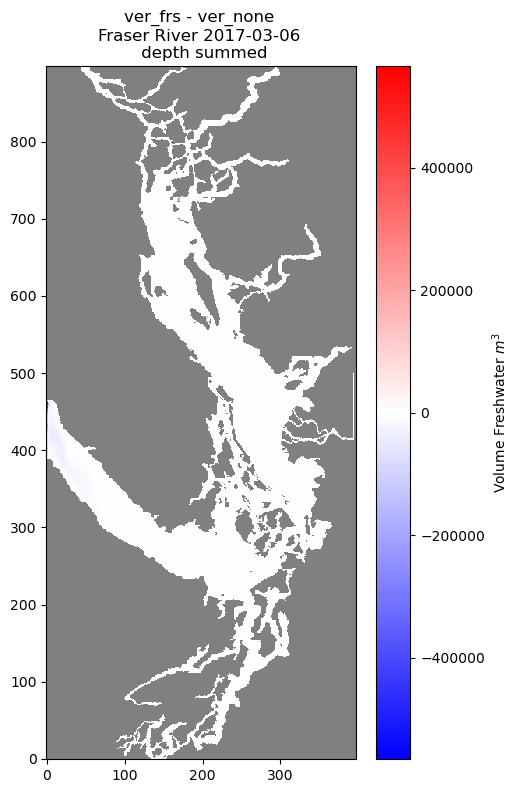

In [88]:
cmap = mpl.colormaps['bwr']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 9))

diff = np.nansum(dye_to_volume(40, volume, rho_inv, ds2['fraser_river'][0]), axis=0) - np.nansum(dye_to_volume(40, volume, rho_inv, ds.fraser_river[time_idx]), axis=0)
freshwater = np.ma.masked_array(diff, mask=tmask[depth])
max_value = np.abs(diff).max()
Z = freshwater + fudge

colours = ax.pcolormesh(X, Y, Z, vmin=-max_value, vmax=max_value, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('ver_frs - ver_none \nFraser River {} \n depth summed'.format(str(dtime.date())))

(0.0, 30.0)

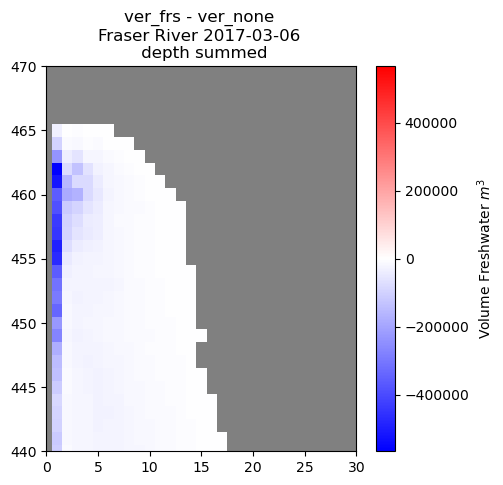

In [89]:
cmap = mpl.colormaps['bwr']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 5))

diff = np.nansum(dye_to_volume(40, volume, rho_inv, ds2['fraser_river'][0]), axis=0) - np.nansum(dye_to_volume(40, volume, rho_inv, ds.fraser_river[time_idx]), axis=0)
freshwater = np.ma.masked_array(diff, mask=tmask[depth])
max_value = np.abs(diff).max()
Z = freshwater + fudge

colours = ax.pcolormesh(X, Y, Z, vmin=-max_value, vmax=max_value, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('ver_frs - ver_none \nFraser River {} \n depth summed'.format(str(dtime.date())))

ax.set_ylim([440, 470])
ax.set_xlim([0, 30])

Text(0.5, 1.0, 'ver_frs - ver_none \nFraser River 2017-03-06 \n depth summed')

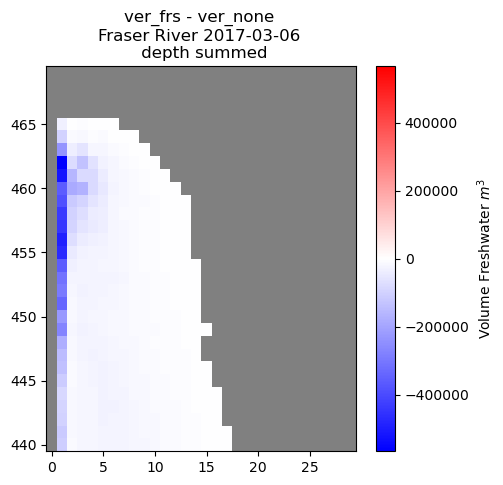

In [90]:
cmap = mpl.colormaps['bwr']
cmap.set_bad('gray')
X = np.arange(0,398)[0:30]
Y = np.arange(0,898)[440:470]

fig, ax = plt.subplots(1,1, figsize = (5, 5))

diff = np.nansum(dye_to_volume(40, volume, rho_inv, ds2['fraser_river'][0]), axis=0)[440:470, 0:30] - np.nansum(dye_to_volume(40, volume, rho_inv, ds.fraser_river[time_idx]), axis=0)[440:470, 0:30]
freshwater = np.ma.masked_array(diff, mask=tmask[depth][440:470, 0:30])
max_value = np.abs(diff).max()
Z = freshwater + fudge
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, vmin=-max_value, vmax=max_value, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Volume Freshwater $m^3$')

dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('ver_frs - ver_none \nFraser River {} \n depth summed'.format(str(dtime.date())))

# ax.set_ylim([440, 470])
# ax.set_xlim([0, 30])